## Employee Analytics Project


In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('employees.csv')

In [3]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [4]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [5]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [71]:
df.duplicated().sum()

3008

In [73]:
df.drop_duplicates(inplace=True)

In [74]:
df.duplicated().sum()

0

### Analysis

In [75]:
# Correlations

In [76]:
df.corr()

C:\Users\Dell1\AppData\Local\Temp\ipykernel_19688\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.007216
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.007091
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.003199
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.002727
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.000369
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.004224
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.004832
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,1.000000


C:\Users\Dell1\AppData\Local\Temp\ipykernel_19688\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

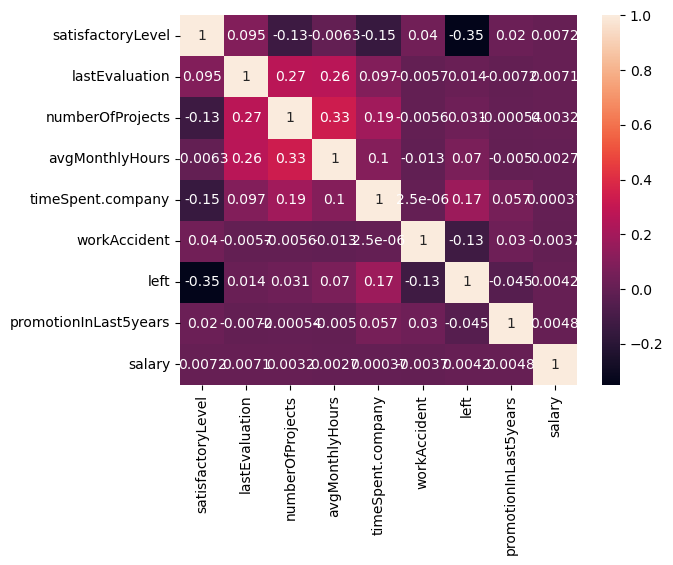

In [77]:
sns.heatmap(df.corr(), annot=True)

C:\Users\Dell1\AppData\Local\Temp\ipykernel_19688\3512116964.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

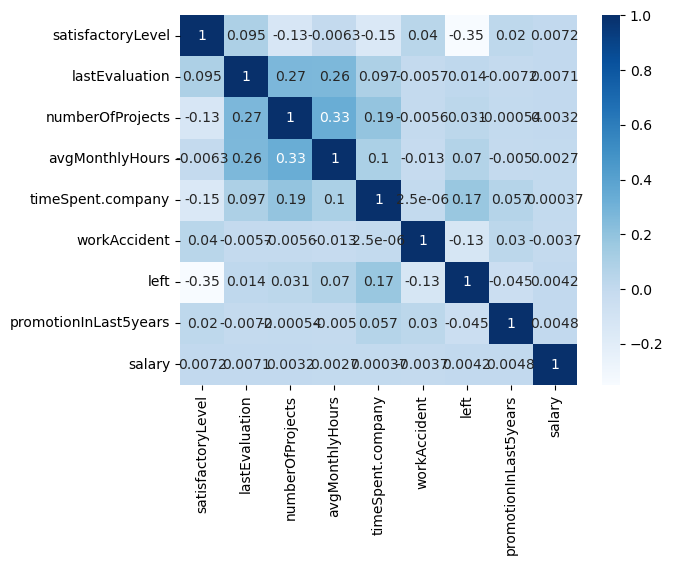

In [78]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [79]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [80]:
# lastEvaluation

<Axes: xlabel='lastEvaluation', ylabel='Count'>

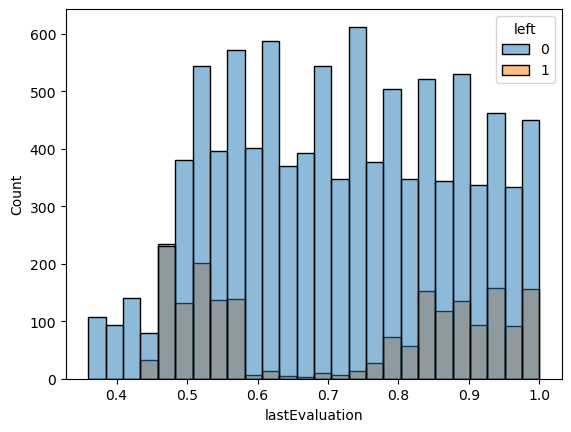

In [81]:
sns.histplot(data=df, x='lastEvaluation', hue='left')

In [82]:
# Inference: Last evaluation doesn't really matter when it come to increasing attrition rate of the company.

In [83]:
# numberOfProjects

In [84]:
df.numberOfProjects.value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: numberOfProjects, dtype: int64

<Axes: xlabel='numberOfProjects', ylabel='count'>

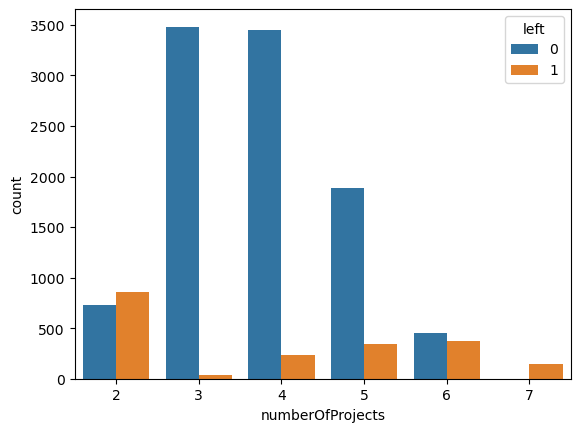

In [85]:
sns.countplot(data=df, x='numberOfProjects', hue='left')

In [86]:
# Inference: People who have worked on only 2 projects and people who have worked on 7 and 7 number of projects have witnessed 
# high attrition rate. 

In [87]:
# timeSpent.company

In [88]:
df['timeSpent.company'].head()

0    3
1    6
2    4
3    3
4    3
Name: timeSpent.company, dtype: int64

<Axes: xlabel='timeSpent.company', ylabel='count'>

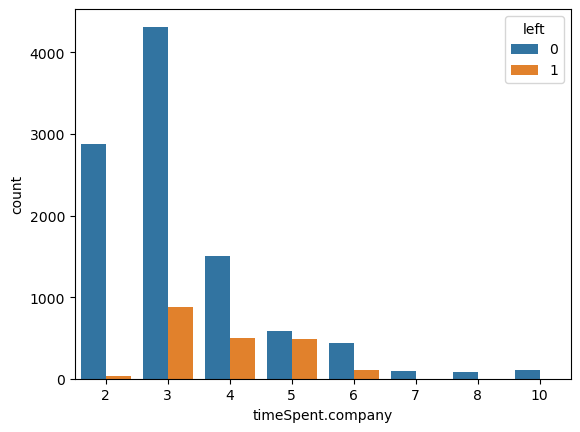

In [89]:
sns.countplot(data=df, x='timeSpent.company', hue='left')

In [90]:
# Inference: People tends to leave the company after 3,4 and 5 years of experience. 
# There is no attrition in people with 7,8 and 10 years of experience. 
# People with 3,4 and 5 years of experience should be considered for hikes/increments/promotions more.

In [91]:
# workAccident

In [92]:
df.workAccident.value_counts()

0    10141
1     1850
Name: workAccident, dtype: int64

<Axes: xlabel='workAccident', ylabel='count'>

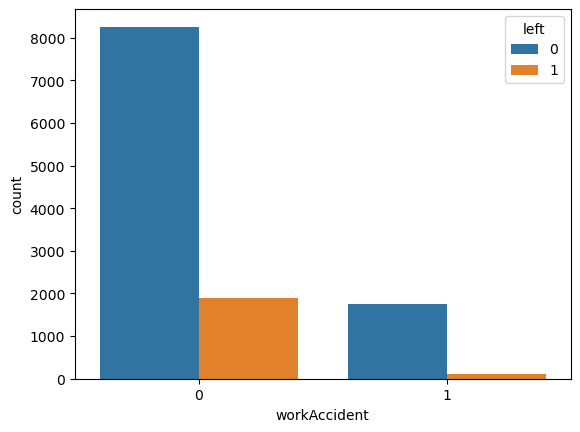

In [93]:
sns.countplot(data=df, x='workAccident', hue='left')

In [94]:
# Inference: There is no significant relationship between work accidents and attration rate. Company have really did well
# when it comed to handeling work accidents.

In [95]:
# promotionInLast5years

In [96]:
df.promotionInLast5years.value_counts()

0    11788
1      203
Name: promotionInLast5years, dtype: int64

<Axes: xlabel='promotionInLast5years', ylabel='count'>

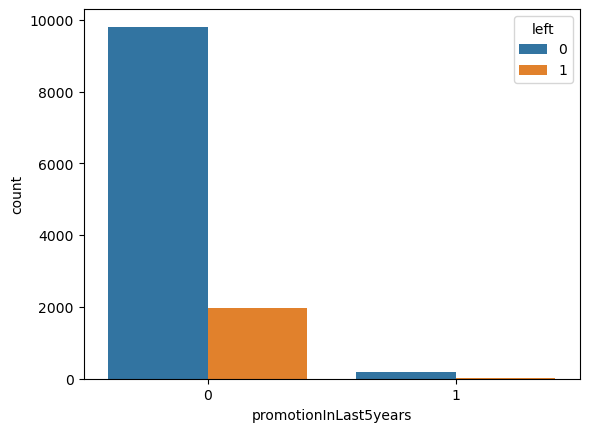

In [97]:
sns.countplot(data=df, x='promotionInLast5years', hue='left')

In [98]:
# inference: Many people have not been promoted for the last 5 years. And this section people are witnessing high attrition rate.
# Try creating more hierarchy in the company so that people could be efficiently promoted.

In [99]:
# dept

In [100]:
df.dept.value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: dept, dtype: int64

In [101]:
round(df.dept.value_counts()/len(df) *100,2)

sales          27.01
technical      18.71
support        15.19
IT              8.14
RandD           5.79
product_mng     5.72
marketing       5.61
accounting      5.18
hr              5.01
management      3.64
Name: dept, dtype: float64

In [102]:
df.dept.nunique()

10

<Axes: xlabel='dept', ylabel='count'>

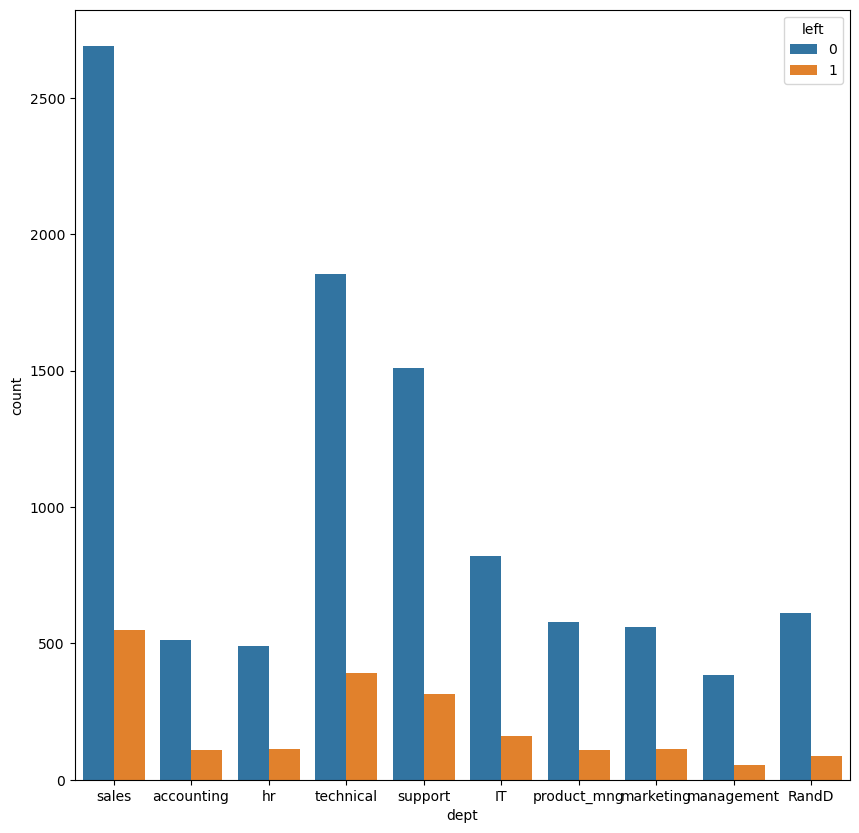

In [103]:

plt.figure(figsize=(10,10))
sns.countplot(data=df, x='dept', hue='left')

In [104]:
# Inference: People from all the deparments are leaving the company. There is no such department which is not experiencing attrition.
# All the departments have to be re organized.

In [105]:
# salary

In [106]:
df.salary.value_counts()

1    5740
2    5261
0     990
Name: salary, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

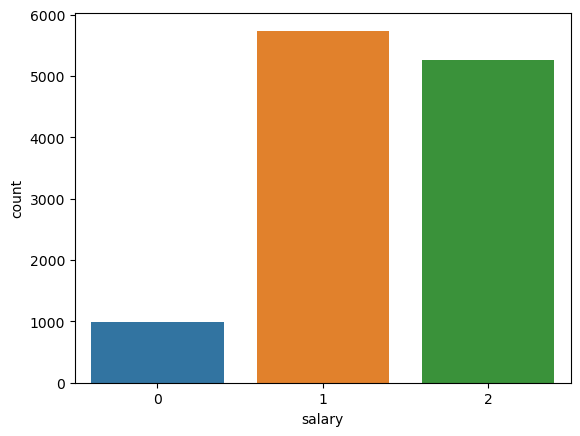

In [107]:
sns.countplot(data=df, x='salary')

<Axes: xlabel='salary', ylabel='count'>

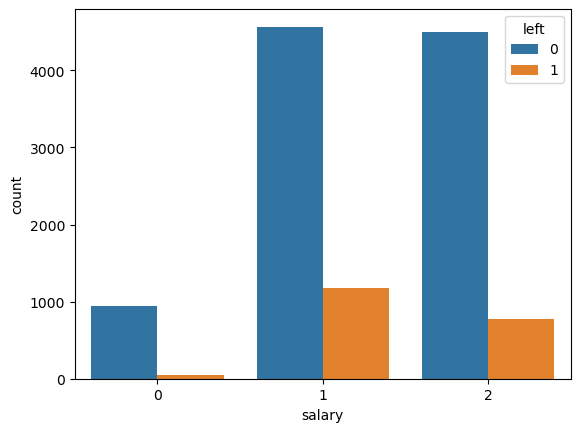

In [108]:
sns.countplot(data=df, x='salary', hue='left')

In [109]:
# Inference: People with low and medium salary shows high attrition rate.

## Inference:

- Last evaluation doesn't really matter when it come to increasing attrition rate of the company.

- People who have worked on only 2 projects and people who have worked on 7 and 7 number of projects have witnessed high attrition rate. 

- People tends to leave the company after 3,4 and 5 years of experience. There is no attrition in people with 7,8 and 10 years of experience. People with 3,4 and 5 years of experience should be considered for hikes/increments/promotions more.

- There is no significant relationship between work accidents and attration rate. Company have really did well when it comed to handeling work accidents.

- Many people have not been promoted for the last 5 years. And this section people are witnessing high attrition rate. Try creating more hierarchy in the company so that people could be efficiently promoted.

- People from all the deparments are leaving the company. There is no such department which is not experiencing attrition. All the departments have to be reorganized and restructured.

- People with low and medium salary shows high attrition rate. Consider giving more bonuses to people with low to medium salary.

In [110]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [111]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Assuming 'your_column' is the column you want to label encode
df['salary'] = le.fit_transform(df['salary'])


In [112]:
X = df.loc[:, ['lastEvaluation','numberOfProjects','timeSpent.company','salary']]

In [113]:
X

,lastEvaluation,numberOfProjects,timeSpent.company,salary
0,0.53,2,3,1
1,0.86,5,6,2
2,0.88,7,4,2
3,0.52,2,3,1
4,0.50,2,3,1
...,...,...,...,...
14992,0.88,5,4,1
14995,0.83,4,2,1
14996,0.72,4,4,1
14997,0.91,5,5,1


In [114]:
y = df['left']

In [115]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14992    0
14995    0
14996    0
14997    0
14998    0
Name: left, Length: 11991, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.7,random_state=10)

In [183]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=10, max_depth=8)

In [184]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=10)

In [185]:
y_pred=rf_model.predict(X_test)

In [186]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [187]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [188]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [189]:
print('Accuracy :', accuracy)
print('Precision :', precision)
print('Recall :', recall)

Accuracy : 0.9530294608115619
Precision : 0.8469696969696969
Recall : 0.8915470494417863


In [190]:
confusion_matrix(y_test,y_pred)

array([[2870,  101],
       [  68,  559]], dtype=int64)

In [191]:
import pickle

with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)